# 검증방식

In [1]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

data = digits.data
target = digits.target

data.shape, target.shape

((1797, 64), (1797,))

## Holdout
- 빠른 속도로 검증 가능

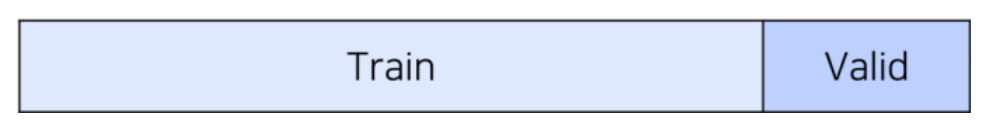

## K-Fold 교차검증(K-Fold cross validation)
- 전체데이터를 k등분하고, 각등분을 한번씩 검증데이터로 사용
- 각폴드의 성능 결과값을 평균내서 검증

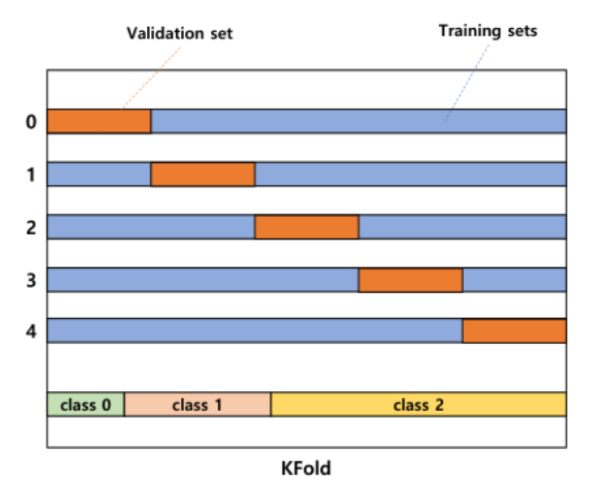

In [2]:
from sklearn.model_selection import KFold

In [3]:
cv = KFold(n_splits=5)
gen = cv.split(data)
gen

<generator object _BaseKFold.split at 0x7f53933104d0>

In [4]:
next(gen)

(array([ 360,  361,  362, ..., 1794, 1795, 1796]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,


In [5]:
SEED = 42

In [6]:
cv = KFold(n_splits=5,shuffle = True,random_state=SEED)
gen = cv.split(data)
next(gen)

(array([   0,    1,    2, ..., 1794, 1795, 1796]),
 array([  23,   29,   30,   32,   44,   49,   51,   59,   65,   67,   69,
          70,   71,   73,   76,   78,   99,  109,  111,  115,  123,  124,
         135,  141,  162,  168,  170,  173,  184,  185,  188,  196,  203,
         210,  212,  220,  233,  237,  239,  240,  244,  247,  250,  251,
         254,  259,  261,  270,  271,  275,  289,  297,  298,  300,  303,
         305,  307,  316,  322,  324,  331,  332,  339,  342,  344,  350,
         351,  352,  354,  365,  366,  367,  371,  374,  381,  382,  383,
         394,  398,  408,  411,  413,  415,  416,  422,  427,  429,  432,
         438,  439,  450,  464,  471,  478,  479,  480,  481,  482,  483,
         486,  495,  497,  514,  518,  526,  527,  530,  532,  534,  535,
         538,  543,  544,  554,  555,  557,  567,  570,  576,  582,  584,
         585,  588,  589,  590,  591,  599,  602,  609,  610,  611,  613,
         617,  618,  619,  631,  637,  643,  650,  651,  660,

In [7]:
for tri,vai in cv.split(data):
    print(tri.shape)
    print(vai.shape)

(1437,)
(360,)
(1437,)
(360,)
(1438,)
(359,)
(1438,)
(359,)
(1438,)
(359,)


- KFold 검증해보기

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
score_list = []
for tri,vai in cv.split(data):
    # 학습데이터
    x_train = data[tri]
    y_train = target[tri]

    # 검증데이터
    x_valid = data[vai]
    y_valid = target[vai]

    model = DecisionTreeClassifier(max_depth=10,random_state=SEED)
    model.fit(x_train,y_train)
    score = model.score(x_valid,y_valid) # 정확도가 반환된다.
    score_list.append(score)
np.mean(score_list)

0.8508511296812132

In [10]:
score_list

[0.85,
 0.8722222222222222,
 0.83008356545961,
 0.8495821727019499,
 0.8523676880222841]

## 층화추출(Stratified K-Fold cross validation)
- 불균형한 클래스 데이터 집합을 위한 KFold 방식
- 정답데이터에서 특정 클래스가 특이하게 많거나 매우 적거나 할때 사용
- 정답데이터의 클래스 비율에 맞춰 학습과 검증데이터를 분배한다.

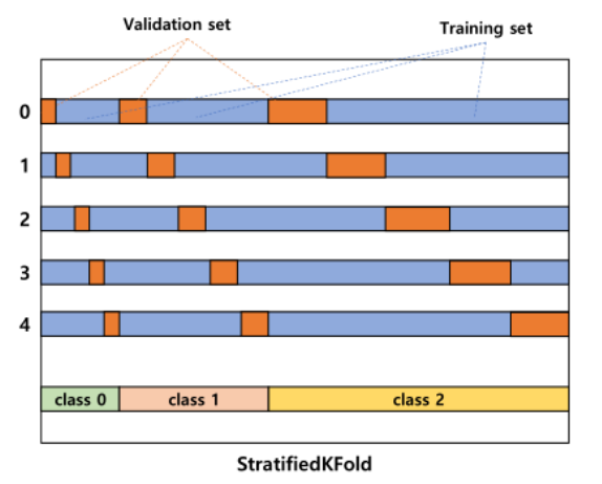

In [11]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5 ,shuffle=True,random_state = SEED)

score_list = []
for tri, vai in cv.split(data,target): # 정답값도 같이 줘야한다.
    x_train = data[tri]
    y_train = target[tri]

    x_valid = data[vai]
    y_valid = target[vai]

    model = DecisionTreeClassifier(max_depth=10,random_state=SEED)
    model.fit(x_train,y_train)
    score = model.score(x_valid,y_valid)
    score_list.append(score)
np.mean(score_list)

0.8553048591767254

In [12]:
score_list

[0.8583333333333333,
 0.8694444444444445,
 0.83008356545961,
 0.8746518105849582,
 0.8440111420612814]

## sklearn.model_selection 모듈을 이용한 교차검증 방법

- 다음의 url을 접속하면 scoring 아규먼트에 대한 옵션을 확인할수 있다.
    - https://scikit-learn.org/stable/modules/model_evaluation.html

In [13]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth=10,random_state=SEED)
cv = KFold(n_splits=5,shuffle=True, random_state=SEED)
score_list = cross_val_score(model,data,target,cv=cv,scoring='neg_log_loss',n_jobs=-1)
score_list

array([-4.4821067 , -3.97905453, -4.70871017, -4.57227195, -4.34210519])

In [14]:
np.mean(score_list)

-4.416849710345938

In [15]:
import os
os.cpu_count()

2

# 과적합
- 과대적합(overfitting)
    - 모델이 학습데이터에 필요 이상으로 적합
    - 데이터 내의 존재하는 규칙뿐만 아니라 불완전한 샘플도 학습
- 과소적합(underfitting)
    - 모델이 학습데이터에 제대로 적합하지 못함
    - 데이터 내에 존재하는 규칙도 제대로 학습 못함.

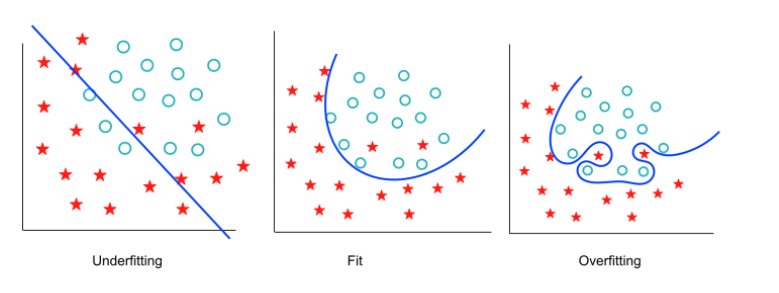

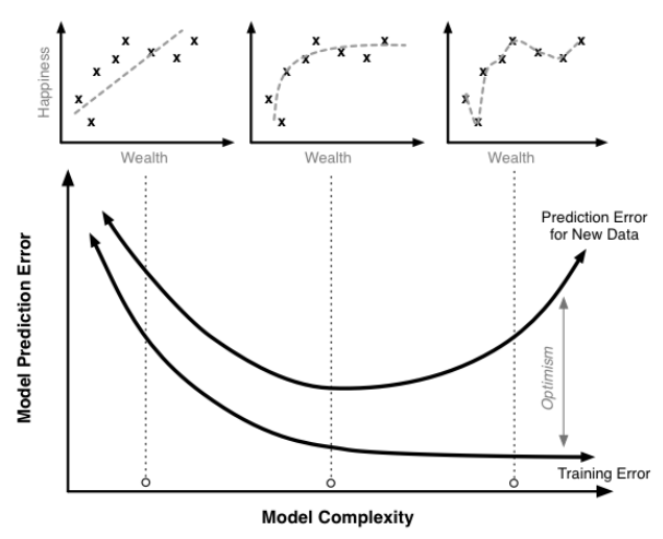

In [16]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [17]:
cols = ["age","sibsp","parch","fare"]
features = df[cols]
target = df["survived"]

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
cols = ["pclass","sex","embarked"]
enc = OneHotEncoder()
tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
tmp
features = pd.concat([features,tmp],axis=1)
features.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           714 non-null    float64
 1   sibsp         891 non-null    int64  
 2   parch         891 non-null    int64  
 3   fare          891 non-null    float64
 4   pclass_1      891 non-null    float64
 5   pclass_2      891 non-null    float64
 6   pclass_3      891 non-null    float64
 7   sex_female    891 non-null    float64
 8   sex_male      891 non-null    float64
 9   embarked_C    891 non-null    float64
 10  embarked_Q    891 non-null    float64
 11  embarked_S    891 non-null    float64
 12  embarked_nan  891 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 90.6 KB


In [20]:
features.age = features.age.fillna(-1)
features.isnull().sum().sum()

0

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_valid, y_train,y_valid= train_test_split(features,target,random_state=SEED,test_size=0.2)

x_train.shape,x_valid.shape, y_train.shape,y_valid.shape

((712, 13), (179, 13), (712,), (179,))

- 모델 복잡도에 따른 overfitting 예제

In [25]:
model = DecisionTreeClassifier(max_depth=100,random_state=SEED)
model.fit(x_train,y_train)
model.score(x_train,y_train) , model.score(x_valid,y_valid)

(0.9803370786516854, 0.770949720670391)

- 모델의 복잡도를 줄인 예제

In [23]:
model = DecisionTreeClassifier(max_depth=3,random_state=SEED)
model.fit(x_train,y_train)
model.score(x_train,y_train) , model.score(x_valid,y_valid)

(0.8146067415730337, 0.7932960893854749)